Erick Camargo Eleutério      | RM99771 

Gabriel Silva                | RM552397 

Henzzo Fonseca de Morais     | RM97917 

Lucas Caspirro Gitti Alcaraz | RM551090

**# CRONOGRAMA MACRO**

**Etapa 1**: Entendimento do Negócio (Business Understanding)
Objetivo: Compreender os objetivos e os requisitos do projeto do ponto de vista do negócio.
Duração: 1 semana

Atividades:
Reunião inicial com stakeholders para definir objetivos e requisitos.
Entendimento das métricas de sucesso para o projeto.
Identificação das principais perguntas de negócios que precisam ser respondidas.
Entregáveis:
Documento de Requisitos do Negócio
Definição dos Objetivos do Projeto
Métricas de Sucesso

**Etapa 2**: Entendimento dos Dados (Data Understanding)
Objetivo: Coletar dados iniciais e familiarizar-se com eles, identificando problemas de qualidade de dados.
Duração: 2 semanas

Atividades:
Coleta de dados relevantes (base de dados sobre attrition).
Análise inicial dos dados para entender a estrutura e o conteúdo.
Verificação de dados ausentes e inconsistentes.
Análise exploratória inicial dos dados (EDA).
Entregáveis:
Relatório de Análise Inicial dos Dados
Sumário Estatístico dos Dados
Identificação de Problemas de Qualidade dos Dados

**Etapa 3**: Preparação dos Dados (Data Preparation)
Objetivo: Limpar e transformar os dados para prepará-los para a modelagem.
Duração: 3 semanas

Atividades:
Limpeza dos dados (tratamento de valores ausentes, inconsistentes, etc.).
Transformação de variáveis categóricas em numéricas.
Criação de novas variáveis relevantes (se necessário).
Balanceamento das classes (oversampling/undersampling).
Divisão dos dados em conjuntos de treino e teste.
Entregáveis:
Base de Dados Limpa e Preparada
Relatório de Preparação dos Dados

**Etapa 4**: Modelagem (Modeling)
Objetivo: Selecionar e aplicar técnicas de modelagem e calibrar os parâmetros do modelo.
Duração: 3 semanas

Atividades:
Seleção dos algoritmos de modelagem (RandomForestClassifier, etc.).
Treinamento e validação dos modelos utilizando validação cruzada.
Ajuste de hiperparâmetros utilizando GridSearchCV.
Avaliação dos modelos com métricas de desempenho (precisão, recall, f1-score, AUC).
Entregáveis:
Modelos Treinados
Relatório de Desempenho dos Modelos

**Etapa 5**: Avaliação (Evaluation)
Objetivo: Avaliar a qualidade dos modelos e verificar se eles atendem aos requisitos do negócio.
Duração: 2 semanas

Atividades:
Avaliação dos modelos em dados de teste.
Comparação dos resultados com as métricas de sucesso definidas na Etapa 1.
Reunião com stakeholders para revisão dos resultados.
Ajustes finais nos modelos (se necessário).
Entregáveis:
Relatório de Avaliação dos Modelos
Revisão Final com Stakeholders

**Etapa 6**: Implantação (Deployment)
Objetivo: Implantar o modelo em um ambiente de produção.
Duração: 2 semanas

Atividades:
Desenvolvimento de um plano de implantação.
Implementação do modelo em um sistema de produção.
Treinamento da equipe de TI e dos usuários finais.
Monitoramento inicial do modelo em produção.
Entregáveis:
Plano de Implantação
Modelo Implementado em Produção
Documentação e Treinamento para Usuários Finais

**Cronograma Resumido**
Semana 1: Entendimento do Negócio
Semana 2-3: Entendimento dos Dados
Semana 4-6: Preparação dos Dados
Semana 7-9: Modelagem
Semana 10-11: Avaliação
Semana 12-13: Implantação

In [ ]:
'''
Link do dataset no kaggle:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
'''

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Verificar os primeiros registros do dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Informações gerais do dataframe
df.info()

# Verificar valores nulos
df.isnull().sum()

# Tratamento de valores nulos (se necessário)
#df = df.dropna()

# Transformar colunas categóricas em numéricas
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Utilizar get_dummies para converter as colunas categóricas restantes
df = pd.get_dummies(df, drop_first=True)

# Verificar as primeiras linhas para confirmar a transformação
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,1,2,3,61,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,92,2,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,1,5,4,56,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,7,1,40,3,...,True,False,False,False,False,False,False,True,False,False


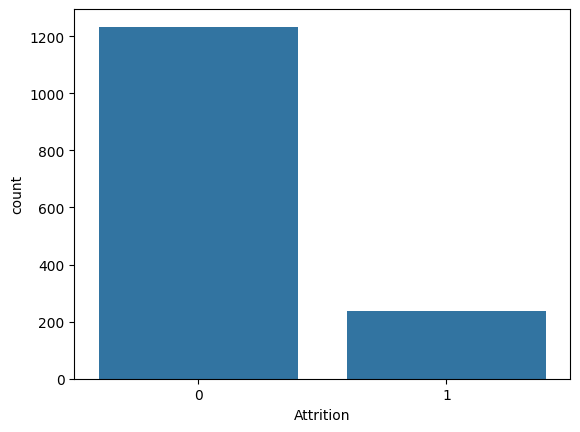

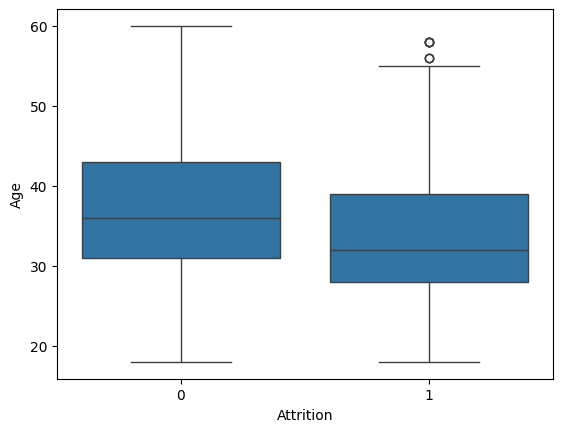

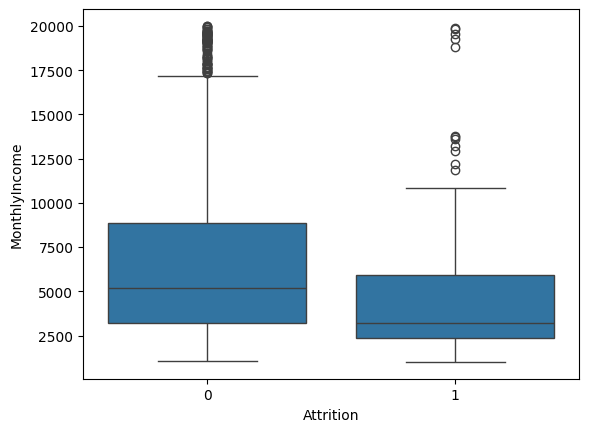

In [ ]:
# Distribuição de Attrition
sns.countplot(x='Attrition', data=df)
plt.show()

# Análise de algumas variáveis
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

RandomForestClassifier:
Melhores Parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Relatório de Classificação (RandomForestClassifier):
[[349  20]
 [ 15 356]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       369
           1       0.95      0.96      0.95       371

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       864
           1       1.00      0.99      1.00       862

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



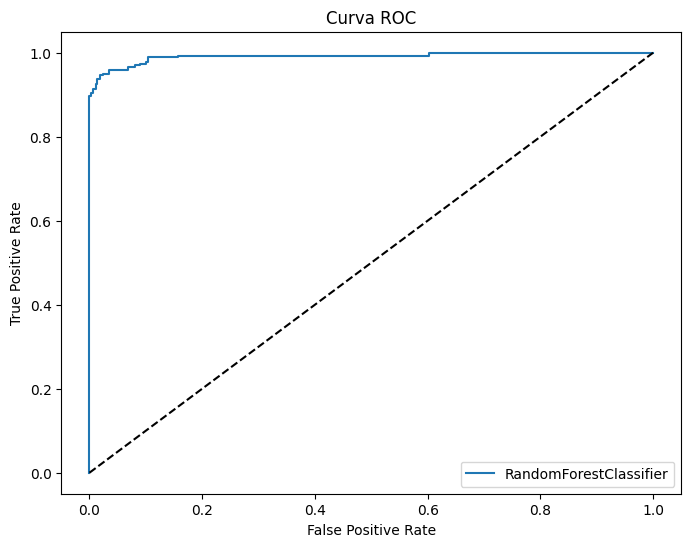

Área sob a Curva ROC (AUC):
RandomForestClassifier: 0.9910444926551691


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

# Preparação dos dados para modelagem
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Balanceamento de Classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# RandomForestClassifier com GridSearchCV e validação cruzada
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100],
          'max_depth': [10, 20],
          'min_samples_split': [5, 10],
          'min_samples_leaf': [2, 4]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf, params, cv=cv, scoring='recall')
rf_grid.fit(X_train, y_train)
print("RandomForestClassifier:")
print("Melhores Parâmetros:", rf_grid.best_params_)

# Avaliação do RandomForestClassifier
rf_best = rf_grid.best_estimator_
rf_y_pred = rf_best.predict(X_test)
print("Relatório de Classificação (RandomForestClassifier):")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Avaliação nos dados de treino
rf_y_train_pred = rf_best.predict(X_train)
print("Relatório de Classificação (Treino):")
print(classification_report(y_train, rf_y_train_pred))

# Calcular e exibir a curva ROC e a área sob a curva (AUC)
rf_y_prob = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

print("Área sob a Curva ROC (AUC):")
print("RandomForestClassifier:", roc_auc_score(y_test, rf_y_prob))